In [102]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\admin\\Desktop\\internshala\\churn_prediction.csv")

In [103]:
#cleaning the data

In [104]:
df.shape

(28382, 21)

In [105]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [106]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [107]:
df.apply(lambda x:sum(x.isnull()),axis=0)

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [108]:
df["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [109]:
df["gender"].fillna("others",inplace=True)

In [110]:
df["dependents"].fillna(0,inplace=True)

In [111]:
df["occupation"].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [112]:
df["occupation"].fillna("company",inplace=True)

In [113]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [114]:
df["city"].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [115]:
df["city"].fillna(400,inplace=True)

In [116]:
df["days_since_last_transaction"].fillna(400,inplace=True)

In [117]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [118]:
#one hot encoder for categorical data

In [119]:
from sklearn import preprocessing
def encoder(df,column):
    le=preprocessing.LabelEncoder()
    le.fit_transform(df[column])
    ohe=preprocessing.OneHotEncoder()
    temp_array=ohe.fit_transform(df[[column]]).toarray()
    column_names=[column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(temp_array,columns=column_names))

In [120]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [121]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,400.0,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,400.0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,others,0.0,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [122]:
df["city"].unique()

array([ 187.,  400.,  146., ...,  556., 1167.,  723.])

In [123]:
df["gender"]

0          Male
1          Male
2          Male
3        others
4          Male
          ...  
28377    Female
28378    Female
28379      Male
28380      Male
28381      Male
Name: gender, Length: 28382, dtype: object

In [124]:
#sorting the columns to categorical,numerical and target variable

In [125]:
categorical=["gender","dependents","occupation"]
target=["churn"]
un=["customer_id"]
numericals=list(set(df.columns.values)-set(categorical)-set(target)-set(un))
numericals

['branch_code',
 'previous_month_debit',
 'previous_month_end_balance',
 'previous_month_credit',
 'previous_month_balance',
 'current_month_credit',
 'average_monthly_balance_prevQ',
 'days_since_last_transaction',
 'average_monthly_balance_prevQ2',
 'current_month_balance',
 'current_balance',
 'city',
 'age',
 'customer_nw_category',
 'current_month_debit',
 'vintage']

In [126]:
#creating new data frame by concatinating numerical and encoded categorical varibles

In [127]:
new_df=df[numericals]
for column in categorical:
    new_df=pd.concat([new_df,encoder(df,column)],axis=1)
new_df.shape

(28382, 39)

In [128]:
new_df.columns

Index(['branch_code', 'previous_month_debit', 'previous_month_end_balance',
       'previous_month_credit', 'previous_month_balance',
       'current_month_credit', 'average_monthly_balance_prevQ',
       'days_since_last_transaction', 'average_monthly_balance_prevQ2',
       'current_month_balance', 'current_balance', 'city', 'age',
       'customer_nw_category', 'current_month_debit', 'vintage',
       'gender_Female', 'gender_Male', 'gender_others', 'dependents_0.0',
       'dependents_1.0', 'dependents_2.0', 'dependents_3.0', 'dependents_4.0',
       'dependents_5.0', 'dependents_6.0', 'dependents_7.0', 'dependents_8.0',
       'dependents_9.0', 'dependents_25.0', 'dependents_32.0',
       'dependents_36.0', 'dependents_50.0', 'dependents_52.0',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

In [129]:
#training the model and predicting

In [130]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,df[target],test_size=0.3)
x.shape
y.shape

(19867, 1)

In [131]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
pred=lr.predict_proba(x_test)[:,1]

In [134]:
#roc_curve visualisation

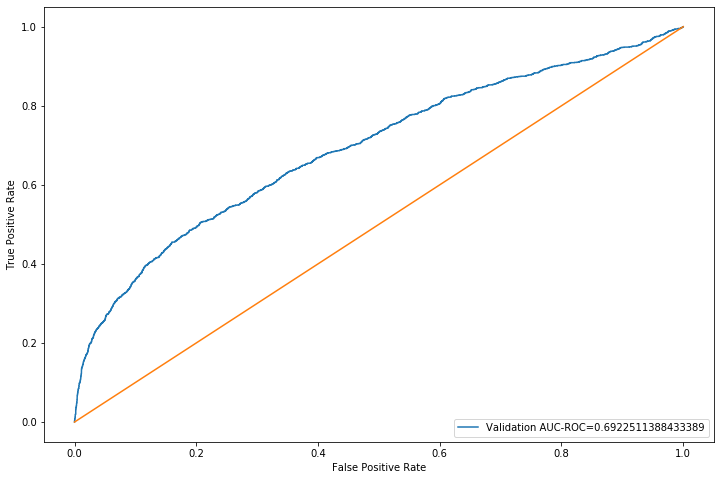

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve 
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [136]:
#confusion matrix visualisation

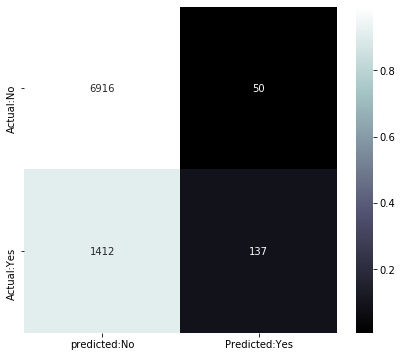

In [137]:
pred_val = lr.predict(x_test)
import seaborn as sns
label_preds = pred_val
cm = confusion_matrix(y_test,label_preds)
def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['predicted:No','Predicted:Yes'], yticklabels=['Actual:No','Actual:Yes'], cmap=cmap)
plot_confusion_matrix(cm,['No','Yes'])

In [138]:
accuracy_score(y_test,pred_val)

0.8283029947152084

In [139]:
precision_score(y_test,pred_val)

0.732620320855615

In [140]:
recall_score(y_test,pred_val)

0.08844415752098128

In [141]:
roc_auc_score(y_test,pred_val)

0.5406332185824831

In [142]:
#cross validation k-fold for training data

In [143]:
model = LogisticRegression()

In [144]:
from sklearn.model_selection import KFold,cross_val_score

In [145]:
cv=KFold(n_splits=10)

In [146]:
for train_index,test_index in cv.split(x):
    model.fit(x[train_index].reshape(-1,1),y.iloc[train_index,-1])
    print(model.score(x[train_index].reshape(-1,1),y.iloc[train_index,-1]))
    print(model.score(x[test_index].reshape(-1,1),y.iloc[test_index,-1]))
    

0.8033333333333333
0.82
0.7988888888888889
0.86
0.7988888888888889
0.86
0.8055555555555556
0.8
0.8022222222222222
0.83
0.8088888888888889
0.77
0.8111111111111111
0.75
0.8055555555555556
0.8
0.8111111111111111
0.75
0.8044444444444444
0.81


In [151]:
#cross validation score for the given data

In [152]:
import warnings
warnings.filterwarnings('ignore')
new_df.shape
df[target].shape
score=cross_val_score(model,new_df,df[target],cv=10)
score.mean()

0.8255583224795281

In [153]:
#cross validation straified k fold

In [154]:
from sklearn.model_selection import StratifiedKFold

In [155]:
accuracy=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,df[target])

10

In [156]:
for train_index,test_index in skf.split(new_df,df[target]):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=df[target].iloc[train_index],df[target].iloc[test_index]
    model.fit(x1_train,y1_train)
    prediction=model.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)

[0.8277562522014794, 0.8270517787953505, 0.8276955602536998, 0.8231148696264975, 0.821000704721635, 0.8255813953488372, 0.8266384778012685, 0.8266384778012685, 0.8227625088090205, 0.8273431994362227]


In [157]:
np.array(accuracy).mean()

0.8255583224795281